In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Bengaluru_House_Data.csv')
df=data.copy()
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.isna().mean()*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [8]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [9]:
df['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [10]:
df1=df.drop(['area_type','society','balcony','availability'], axis=1)
df1.shape

(13320, 5)

In [11]:
df1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
df2=df1.dropna()
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df2.shape

(13246, 5)

In [14]:
df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


In [18]:
df2['total_sqft'].shape

(13246,)

In [19]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [20]:
def convert_sqft_to_num(x):
    y = x.split('-')
    if len(y) == 2:
        return (float(y[0])+float(y[1]))/2
    try:
        return float(x)
    except:
        return None 

In [21]:
df3=df2.copy()
df3['total_sqft']=df3['total_sqft'].astype(str).apply(convert_sqft_to_num)
df3=df3[df3['total_sqft'].notnull()]
df3.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [22]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

## Feature Engeneering

In [23]:
df5=df3.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
df5['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [25]:
df5['location']=df5['location'].apply(lambda x:x.strip() if isinstance(x, str) else x)
location_stats=df5['location'].value_counts(ascending=False)
location_stats

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [26]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10


location
BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [27]:
df5['location']=df5['location'].apply(lambda x:'other'if x in location_stats_less_than_10 else x)
df5['location'].value_counts()

location
other              2872
Whitefield          533
Sarjapur  Road      392
Electronic City     304
Kanakpura Road      264
                   ... 
Doddaballapur        11
Tindlu               11
Marsur               11
HAL 2nd Stage        11
Kodigehalli          11
Name: count, Length: 241, dtype: int64

In [28]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


## Outlier removal

### Remove Outliers for Price Per Sqft

<Axes: >

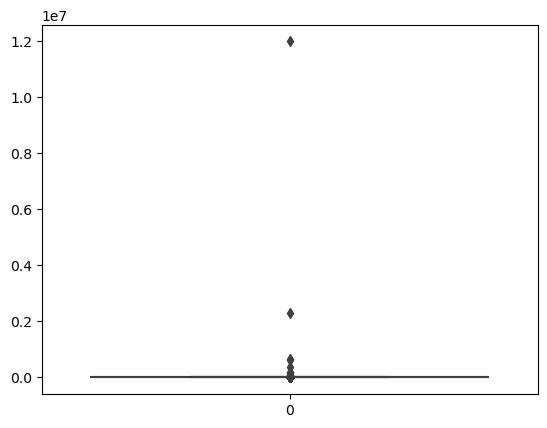

In [29]:
sns.boxplot(data=df5['price_per_sqft'])


In [30]:
df5['price_per_sqft'].describe().round(2)

count       13200.00
mean         7920.76
std        106727.16
min           267.83
25%          4267.70
50%          5438.33
75%          7317.07
max      12000000.00
Name: price_per_sqft, dtype: float64

In [31]:
# Calculate Q1, Q3, and IQR
Q1 = df5['price_per_sqft'].quantile(0.25)
Q3 = df5['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_df = df5[(df5['price_per_sqft'] >= lower_bound) & (df5['price_per_sqft'] <= upper_bound)]


<Axes: >

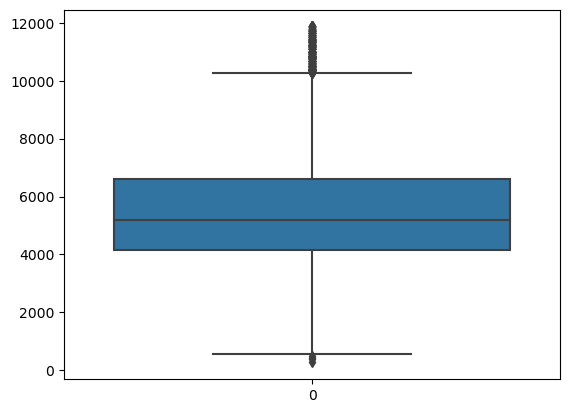

In [32]:
sns.boxplot(data=filtered_df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

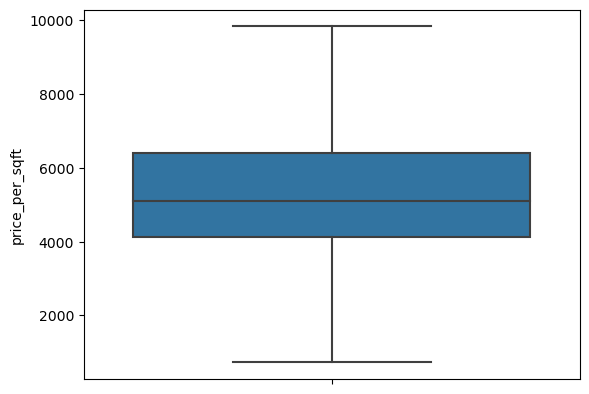

In [33]:
# Step 1: Calculate Q1, Q3, IQR, and filter outliers
Q1 = df5['price_per_sqft'].quantile(0.25)
Q3 = df5['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = df5[(df5['price_per_sqft'] >= lower_bound) & (df5['price_per_sqft'] <= upper_bound)]

# Step 2: Recalculate Q1, Q3, and IQR for filtered data
new_Q1 = filtered_df['price_per_sqft'].quantile(0.25)
new_Q3 = filtered_df['price_per_sqft'].quantile(0.75)
new_IQR = new_Q3 - new_Q1
new_lower_bound = new_Q1 - 1.5 * new_IQR
new_upper_bound = new_Q3 + 1.5 * new_IQR
filtered_df2 = filtered_df[(filtered_df['price_per_sqft'] >= new_lower_bound) & (filtered_df['price_per_sqft'] <= new_upper_bound)]

# Step 3: Visualize boxplot for filtered data
#plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_df2, y='price_per_sqft',showfliers=False)

In [34]:
print('lower bond is :' ,lower_bound, 'and', 'new lower bond is:', new_lower_bound)


lower bond is : -306.3563930391938 and new lower bond is: 511.6522527325037


In [35]:
print('Upper bond is :' ,upper_bound, 'and', 'new Upper bond is:', new_upper_bound)

Upper bond is : 11891.130908994248 and new Upper bond is: 10258.357356556939


In [36]:
filtered_df2['price_per_sqft'].max()

10256.410256410256

In [37]:
filtered_df2['price_per_sqft'].min()

573.921028466483

In [38]:
filtered_df2.shape

(11507, 7)

In [39]:
df5.shape

(13200, 7)

### Remove Outliers for Price 

In [40]:
df6=filtered_df2.copy()
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


<Axes: ylabel='price'>

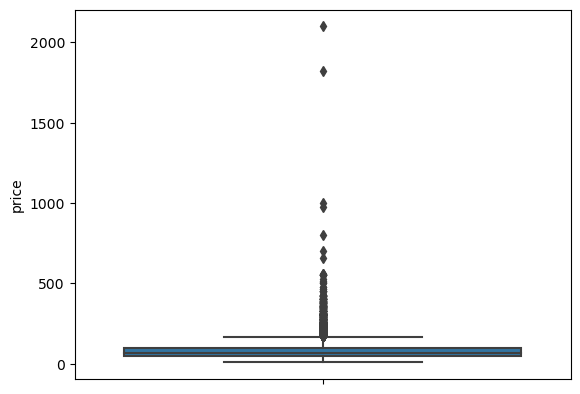

In [41]:
sns.boxplot(data=df6,y='price')

<Axes: ylabel='price'>

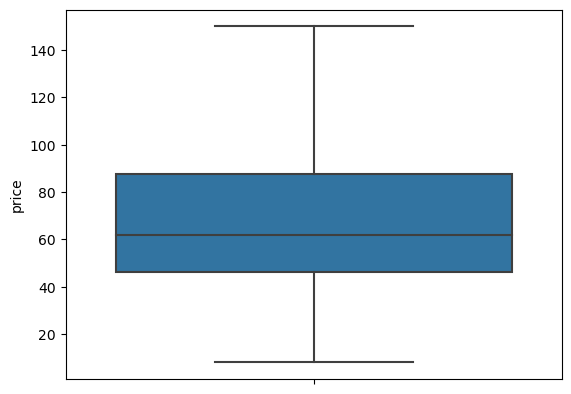

In [42]:
Q1=df6['price'].quantile(0.25)
Q3=df6['price'].quantile(0.75)
IQR=Q3-Q1
lo_bound=Q1-1.5*IQR
up_bound=Q3+1.5*IQR
df7=df6[(df6['price']>=lo_bound) & (df6['price']<=up_bound)]
sns.boxplot(data=df7,y='price',showfliers=False)

In [43]:
filtered_df2['price'].min()

8.0

In [44]:
lower_bound

-306.3563930391938

In [45]:
lo_bound

-26.17375

### Remove Outliers for Total Sqft

In [46]:
df7.shape

(10691, 7)

In [47]:
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


<Axes: ylabel='total_sqft'>

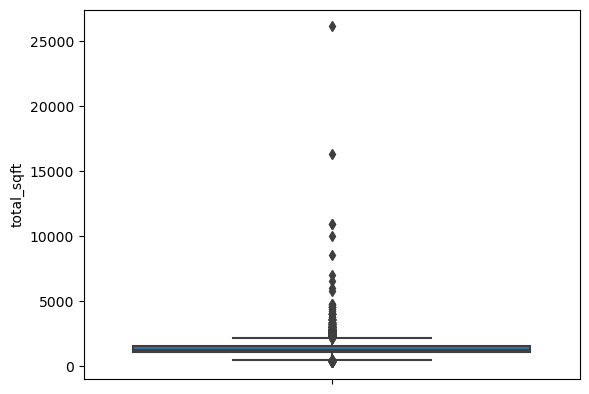

In [48]:
sns.boxplot(data=df7,y='total_sqft')

<Axes: ylabel='total_sqft'>

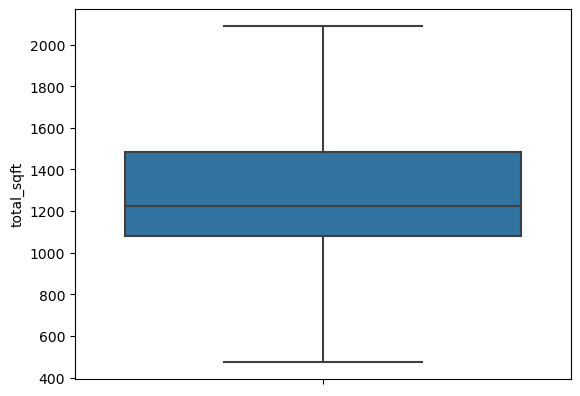

In [49]:
Q1t=df7['total_sqft'].quantile(0.25)
Q3t=df7['total_sqft'].quantile(0.75)
IQRt=Q3t-Q1t
low_bound=Q1t-1.5*IQRt
upp_bound=Q3t+1.5*IQRt
df8=df7[(df7['total_sqft']>=low_bound) & (df7['total_sqft']<=upp_bound)]
sns.boxplot(data=df8,y='total_sqft',showfliers=False)

### Remove Outliers for bhk

<Axes: ylabel='bhk'>

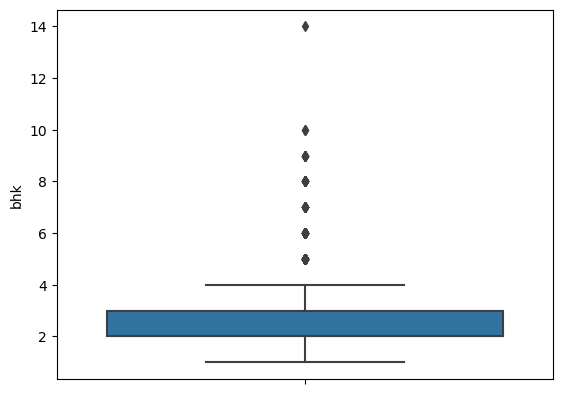

In [50]:
sns.boxplot(data=df8,y='bhk')

In [51]:
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248


<Axes: ylabel='bhk'>

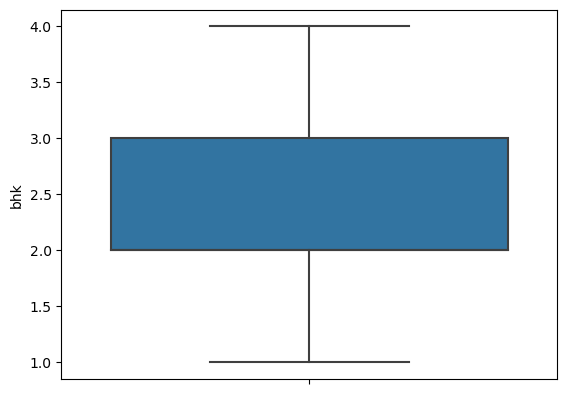

In [52]:
Q1b=df8['bhk'].quantile(0.25)
Q3b=df8['bhk'].quantile(0.75)
IQRb=Q3b-Q1b
lowe_bound=Q1b-1.5*IQRb
uppe_bound=Q3b+1.5*IQRb
df9=df8[(df8['bhk']>=lowe_bound) & (df8['bhk']<=uppe_bound)]
sns.boxplot(data=df9,y='bhk')


In [53]:
df8.shape

(10204, 7)

In [54]:
df9.shape

(10056, 7)

In [55]:
df9.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7752,Bommanahalli,2 BHK,1020.0,2.0,55.00,2,5392.156863
292,Electronic City Phase II,2 BHK,1069.0,2.0,45.00,2,4209.541628
683,other,3 BHK,1875.0,3.0,165.00,3,8800.000000
9484,Bommasandra Industrial Area,2 BHK,1160.0,2.0,33.51,2,2888.793103
3226,Sarjapura - Attibele Road,2 BHK,829.0,2.0,22.80,2,2750.301568


In [58]:
df10.location.nunique()

239

In [59]:
df10=df9[df9.bath<df9.bhk+2]
df10.shape

(10048, 7)

In [60]:
df10.to_csv(r'C:\Users\Ossama\Desktop\House Price Project\cleaned_House_Price.csv',index=False)

In [61]:
df11=pd.get_dummies(df10,columns=['location'],drop_first=True,dtype=int)
df11.head(3)

,size,total_sqft,bath,price,bhk,price_per_sqft,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_5th Block Hbr Layout,location_5th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2 BHK,1056.0,2.0,39.07,2,3699.810606,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3 BHK,1440.0,2.0,62.00,3,4305.555556,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3 BHK,1521.0,3.0,95.00,3,6245.890861,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)


,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
df30=pd.concat([df10,dummies],axis=1)
df30.head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
df12=df30.drop(['size','location','other'],axis=1)
df12.head(3)

,total_sqft,bath,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,3699.810606,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,62.00,3,4305.555556,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,95.00,3,6245.890861,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [65]:
X=df12.drop(['price','price_per_sqft'],axis=1)
y=df12['price']

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [67]:
from sklearn.model_selection import GridSearchCV,ShuffleSplit
from sklearn.linear_model import LinearRegression,lasso_path
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    models=[
        (LinearRegression(),{'fit_intercept': [True, False]}),
        (RandomForestRegressor(),{'max_depth': [None,2,5],'min_samples_split': [2,4,6,8]}),
        (DecisionTreeRegressor(),{'criterion':['mse','friedman_mse'],'splitter':['best','random']})
    ]
    
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)
    
    score=[]
    
    for model,params in models:
        gs=GridSearchCV(model,params,cv=cv,return_train_score=False)
        gs.fit(X,y)
    
    score.append({
        'model':model.__class__.__name__,
        'best_score':gs.best_score_,
        'best_params':gs.best_params_
    })
    return pd.DataFrame(score,columns=['model','best_score','best_params'])

results=find_best_model_using_gridsearchcv(X,y)
results

,model,best_score,best_params
0,DecisionTreeRegressor,0.579591,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [68]:
# Define models and hyperparameter grids
param_grids = {
     "Linear Regression": (LinearRegression(), {}),
    "Decision Tree": (DecisionTreeRegressor(), {"max_depth": [3, 5, 10]}),
    "Random Forest": (RandomForestRegressor(random_state=42), {"n_estimators": [50, 100, 200]})
}
   
# List to store results for the DataFrame
results_list = []   
# Evaluate each model with GridSearchCV
best_estimators = {}
for name, (model, param_grid) in param_grids.items():
    print(f"Optimizing {name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, return_train_score=False, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_score = -grid_search.best_score_  # Convert negative MSE back to positive
    results_list.append({
        "Model": name,
        "Best Score (MSE)": best_score,
        "Best Parameters": grid_search.best_params_
    })
    best_estimators[name] = best_model
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Mean Squared Error (CV): {best_score:.4f}\n")

Optimizing Linear Regression...
Best parameters for Linear Regression: {}
Mean Squared Error (CV): 9469928351949.7695

Optimizing Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10}
Mean Squared Error (CV): -0.6232

Optimizing Random Forest...
Best parameters for Random Forest: {'n_estimators': 200}
Mean Squared Error (CV): -0.6671



In [69]:
# Create a DataFrame from the results
results_df = pd.DataFrame(results_list)
results_df['Best Score (MSE)']=results_df['Best Score (MSE)'].round(2)
results_df


,Model,Best Score (MSE),Best Parameters
0,Linear Regression,9.469928e+12,{}
1,Decision Tree,-6.200000e-01,{'max_depth': 10}
2,Random Forest,-6.700000e-01,{'n_estimators': 200}


In [70]:
# Select the best model
best_model_row = results_df.loc[results_df["Best Score (MSE)"].idxmin()]
best_model_name = best_model_row["Model"]
best_model = best_estimators[best_model_name]
print(f"\nBest Model: {best_model_name} with MSE = {best_model_row['Best Score (MSE)']:.4f}")


Best Model: Random Forest with MSE = -0.6700


In [71]:
from sklearn.metrics import mean_squared_error
# Evaluate the best model on the test set
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error of Best Model ({best_model_name}): {test_mse:.4f}")

Test Mean Squared Error of Best Model (Random Forest): 286.1030


In [72]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([ 6.75026356e-01,  6.73669301e-01,  6.74870577e-01,  6.76523631e-01,
       -2.63604428e+16])

In [73]:
def predict_price(location,sqft,bath,bhk):
    
    #indexing location:
    loc_index=np.where(X.columns==location)[0][0]
    
    # Create zeros vector imput:
    m=np.zeros(len(X.columns))
    m[0]=sqft
    m[1]=bath
    m[2]=bhk
    if loc_index>=0:
        m[loc_index]=1
        
    # Make prediction:
    return model.predict([m])[0]
    